## Generating Bingo Cards for the PeopleTeam @ Locaria

### Description: 
A Bingo card is a NxN grid, commonly with N=5, in which it contains NxN - 1 available grids, given that the center grid is always free. The goal of the game is to fill in all the grids except the center one, in a random order. The game is played by calling out numbers, and the player marks the number on their card if it is present. The first player to fill in all the grids except the center one wins the game.

### Variations: 
There are going to be two variations: 
1. Classical Bingo - with numbers from 1 to 101. 
2. Textual Bingo - with words from a list of words.

### Rules:
1. The game is played by calling out numbers, and the player marks the number on their card if it is present.
2. The first player to fill in all the grids except the center one wins the game.
3. The game is played by calling out words, and the player marks the word on their card if it is present.
4. The first player to fill in all the grids except the center one wins the game.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
TOTAL_TO_GENERATE = 106 

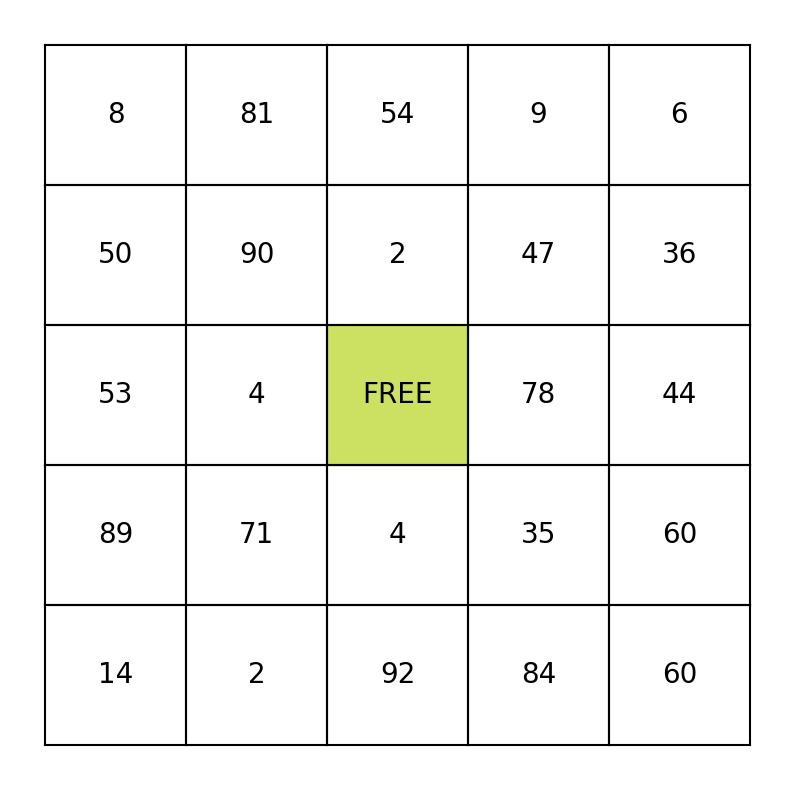

In [17]:
PARAMETERS = {
    "W": 5, 
    "H":5,
    "MIN_VALUE":1,
    "MAX_VALUE":101,
    "MULTIPLIER":2,
    "FREE_SPACE":True,
    "FREE_SPACE_VALUE":"FREE",
    "ADD_RANDOM_COLORS":False,
}

COLORS = {
    "Purple":"#871882",
    "Aqua":"#17DDBF",
    "Tangerine":"#FF8850",
    "Lime":"#CCE161"
}

SETUP_PARAMETERS = {
    "TOTAL_NUMBERS" : (PARAMETERS['W'] * PARAMETERS['H']) - 1,
    "MIN_VALUE" : PARAMETERS['MIN_VALUE'],
    "MAX_VALUE" : PARAMETERS['MAX_VALUE'],
    "FREE_SLOT_COORD" : (PARAMETERS['W']//2, PARAMETERS['H']//2),
    "FIGURE_SIZE" : (PARAMETERS['W']*PARAMETERS['MULTIPLIER'], PARAMETERS['H']*PARAMETERS['MULTIPLIER'])
}

def create_bingo_card():
    ## CREATING THE FIGURE 
    fig = plt.figure(figsize=SETUP_PARAMETERS["FIGURE_SIZE"])
    ax = fig.add_subplot(111)

    ## MAKING THE GRID
    for x in range(PARAMETERS['W']):
        for y in range(PARAMETERS['H']):
            ax.plot([x, x+1], [y, y], color='black')
            ax.plot([x, x], [y, y+1], color='black')
            ax.plot([x+1, x+1], [y, y+1], color='black')
            ax.plot([x, x+1], [y+1, y+1], color='black')
    ax.axis('off')
    return ax


def get_random_color():
    return COLORS[np.random.choice(list(COLORS.keys()))]

def color_free_slot(some_ax,color):
    some_ax.add_patch(plt.Rectangle((SETUP_PARAMETERS["FREE_SLOT_COORD"][0], SETUP_PARAMETERS["FREE_SLOT_COORD"][1]), 1, 1, color=color))

def text_free_slot(some_ax, text):
    some_ax.text(SETUP_PARAMETERS["FREE_SLOT_COORD"][0]+0.5, SETUP_PARAMETERS["FREE_SLOT_COORD"][1]+0.5, text, horizontalalignment='center', verticalalignment='center', fontsize=20)

def get_random_numbers():
    numbers = np.random.randint(PARAMETERS["MIN_VALUE"], PARAMETERS["MAX_VALUE"], SETUP_PARAMETERS["TOTAL_NUMBERS"])
    np.random.shuffle(numbers)
    return numbers

def fill_grid(some_ax,numbers_list):
    ## FILLING THE GRID
    numbers = numbers_list
    for x in range(PARAMETERS['W']):
        for y in range(PARAMETERS['H']):
            if (x, y) != SETUP_PARAMETERS["FREE_SLOT_COORD"]:
                ## choose a random number from the list numbers and remove it from the list
                number = numbers[0]
                ## make sure that the same color is not used twice in adjacent cells
                some_ax.text(x+0.5, y+0.5, number, horizontalalignment='center', verticalalignment='center', fontsize=20)
                numbers = numbers[1:]

## create the bingo card 
bingo_card = create_bingo_card()

## color the free slot
free_slot_color = get_random_color()
color_free_slot(bingo_card, free_slot_color)

## add text to the free slot
text_free_slot(bingo_card, PARAMETERS["FREE_SPACE_VALUE"])

## fill the grid with random numbers
numbers = get_random_numbers()
fill_grid(bingo_card, numbers)

## Save the configuration of a single bingo card
CONFIGURATION = {
    "W":PARAMETERS['W'],
    "H":PARAMETERS['H'],
    "TOTAL_NUMBERS":SETUP_PARAMETERS["TOTAL_NUMBERS"],
    "MIN_VALUE": PARAMETERS["MIN_VALUE"],
    "MAX_VALUE": PARAMETERS["MAX_VALUE"],
    "FREE_SLOT_COORD": SETUP_PARAMETERS["FREE_SLOT_COORD"],
    "LOCARIA_COLORS": COLORS,
    "ADD_RANDOM_LOCARIA_COLOR": PARAMETERS['ADD_RANDOM_COLORS'],
    "MULTIPLIER": PARAMETERS['MULTIPLIER'],
    "FIGURE_SIZE": SETUP_PARAMETERS["FIGURE_SIZE"],
    "FREE_SLOT_COLOR":free_slot_color,
}
## SHOW THE FIGURE
# bingo_card.axis('off')
plt.show()

In [4]:
CONFIGURATION

{'W': 5,
 'H': 5,
 'TOTAL_NUMBERS': 24,
 'MIN_VALUE': 1,
 'MAX_VALUE': 101,
 'FREE_SLOT_COORD': (2, 2),
 'LOCARIA_COLORS': {'Purple': '#871882',
  'Aqua': '#17DDBF',
  'Tangerine': '#FF8850',
  'Lime': '#CCE161'},
 'ADD_RANDOM_LOCARIA_COLOR': False,
 'MULTIPLIER': 2,
 'FIGURE_SIZE': (10, 10),
 'FREE_SLOT_COLOR': '#FF8850'}

In [6]:
## use hugging face GPT2 to generate sentences to be able to fill the variation #2 
## https://huggingface.co/transformers/model_doc/gpt2.html
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')

In [15]:
## set the seed 
set_seed(42)
## generate a sentence
sent = """
1. I am proactive 
2. I am a good listener
3. I am a good communicator
4. 
"""
output = generator(sent, max_length=400, num_return_sequences=1)
print(output[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



1. I am proactive 
2. I am a good listener
3. I am a good communicator
4. 
5.   I am active in my life 
6.   I am active in my life  7.   I am active in life  8.    I go to other people's homes as often as possible  9.   
8. In a way I think I have to  
9.   It means I have to give back  
10.   I have no hope for my daughter  
11.    But I will be happy  
12.   I am a good listener    
13. I am strong  
14.   I am a strong  good communicator  
15.  I am a good communicator    
